In [2]:
import pandas as pd

df_train = pd.read_json("../data/raw/training_merged.json", orient="records", lines=True)
df_dev = pd.read_json("../data/raw/development_merged.json", orient="records", lines=True)
df_test = pd.read_json("../data/raw/test-gold_merged.json", orient="records", lines=True)
print(df_train.head())

df_train['source'] = 'train'
df_dev['source'] = 'dev'
df_test['source'] = 'test'

df_all = pd.concat([df_train, df_dev, df_test], ignore_index=True)
print(df_all.head())
# Labels:
# 0: anger
# 1: joy
# 2: fear
# 3: sadness


                                               tweet emotion  score
0  @xandraaa5 @amayaallyn6 shut up hashtags are c...   anger  0.562
1  it makes me so fucking irate jesus. nobody is ...   anger  0.750
2         Lol Adam the Bull with his fake outrage...   anger  0.417
3  @THATSSHAWTYLO passed away early this morning ...   anger  0.354
4  @Kristiann1125 lol wow i was gonna say really?...   anger  0.438
                                               tweet emotion  score source
0  @xandraaa5 @amayaallyn6 shut up hashtags are c...   anger  0.562  train
1  it makes me so fucking irate jesus. nobody is ...   anger  0.750  train
2         Lol Adam the Bull with his fake outrage...   anger  0.417  train
3  @THATSSHAWTYLO passed away early this morning ...   anger  0.354  train
4  @Kristiann1125 lol wow i was gonna say really?...   anger  0.438  train


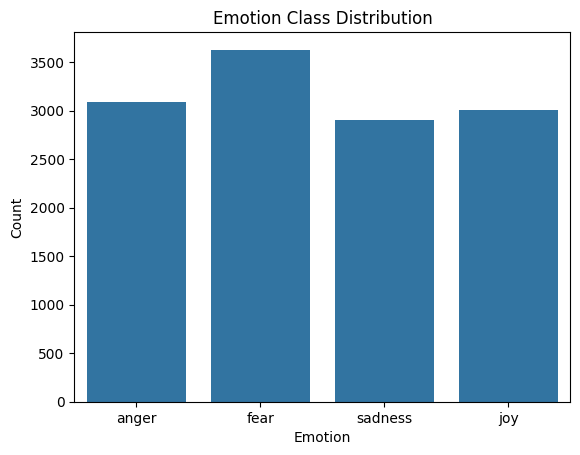

         All %  Train %  Dev %  Test %
emotion                               
fear     28.71    31.71  26.57   24.24
anger    24.47    23.95  26.50   24.63
joy      23.83    22.75  19.81   27.16
sadness  22.99    21.59  27.12   23.97


In [22]:
# Emotion Class Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='emotion', data=df_all)
plt.title("Emotion Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

# print(df_all['emotion'].value_counts()) 
all_perc = df_all['emotion'].value_counts(normalize=True) * 100

train_perc = df_train['emotion'].value_counts(normalize=True) * 100
dev_perc = df_dev['emotion'].value_counts(normalize=True) * 100
test_perc = df_test['emotion'].value_counts(normalize=True) * 100

class_imbalance = pd.concat([all_perc, train_perc, dev_perc, test_perc], axis=1)
class_imbalance.columns = ['All %', 'Train %', 'Dev %', 'Test %']
class_imbalance = class_imbalance.round(2)
print(class_imbalance)

In [3]:
all_count = df_all['emotion'].value_counts()

train_count = df_train['emotion'].value_counts()
dev_count = df_dev['emotion'].value_counts()
test_count = df_test['emotion'].value_counts()

class_count = pd.concat([all_count, train_count, dev_count, test_count], axis=1)
class_count.columns = ['All', 'Train', 'Dev', 'Test']
print(class_count)

          All  Train  Dev  Test
emotion                        
fear     3627   2252  389   986
anger    3091   1701  388  1002
joy      3011   1616  290  1105
sadness  2905   1533  397   975


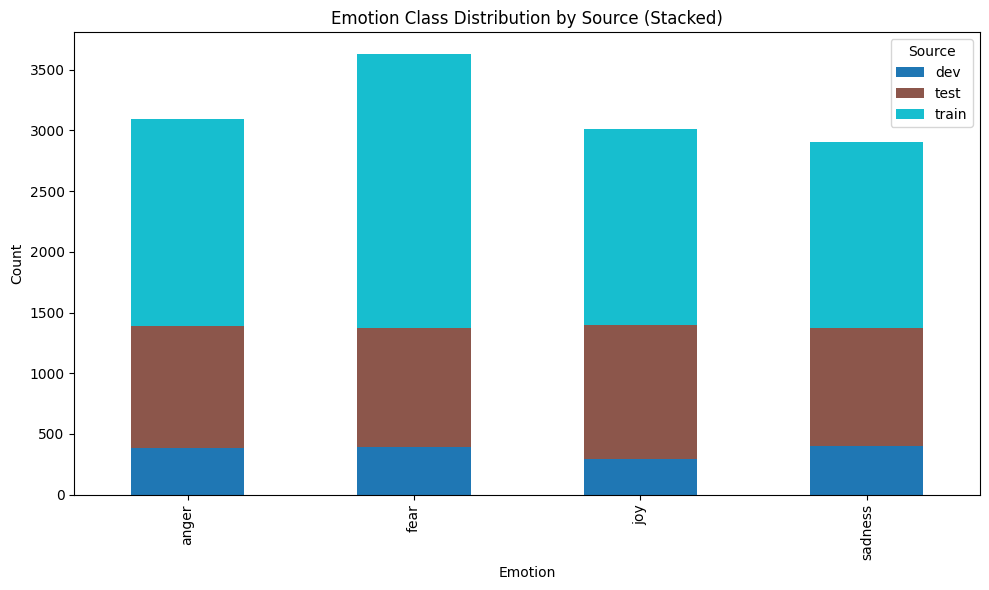

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pivot table: rows = emotion, columns = source, values = counts
emotion_counts = df_all.groupby(['emotion', 'source']).size().unstack(fill_value=0)

# Plot stacked bar chart
emotion_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')

plt.title("Emotion Class Distribution by Source (Stacked)")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.legend(title='Source')
plt.tight_layout()
plt.show()



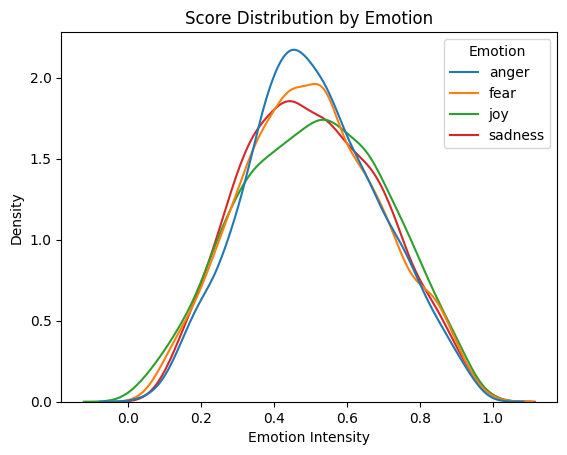

Emotion
joy        0.509170
anger      0.506087
sadness    0.504681
fear       0.502309
Name: Score, dtype: float64


In [ ]:
sns.kdeplot(data=df_all, x="Score", hue="Emotion", common_norm=False)
plt.title("Score Distribution by Emotion")
plt.xlabel("Emotion Intensity")
plt.show()


mean_scores = df.groupby("Emotion")["Score"].mean().sort_values(ascending=False)
print(mean_scores)

In [ ]:
# Shows the most used words in each of the classes
from sklearn.feature_extraction.text import CountVectorizer
sampled_df= df_all.sample(1000, random_state=42)

# Group by label and get common words
for emotion in sampled_df['Emotion'].unique():
    texts = sampled_df[sampled_df['Emotion'] == emotion]['Tweet']
    
    vec = CountVectorizer(stop_words='english', max_features=10)
    X = vec.fit_transform(texts)
    top_words = vec.get_feature_names_out()

    print(f"\nTop words for '{emotion}':")
    print(", ".join(top_words))


Top words for 'fear':
amp, bad, don, fear, just, know, like, nervous, start, today

Top words for 'joy':
amazing, birthday, day, good, happy, just, know, live, smile, watch

Top words for 'sadness':
dark, day, depression, don, feel, just, like, lost, sadness, time

Top words for 'anger':
anger, don, just, know, life, like, mad, need, think, time


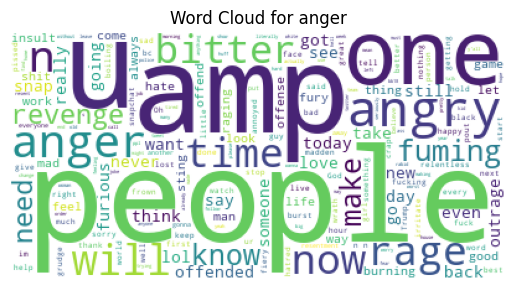

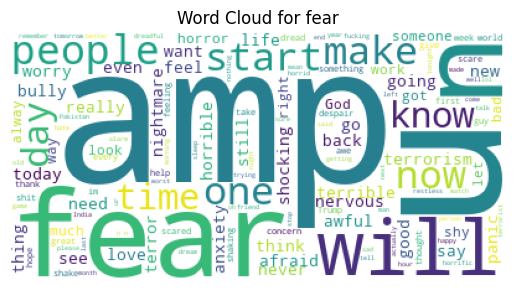

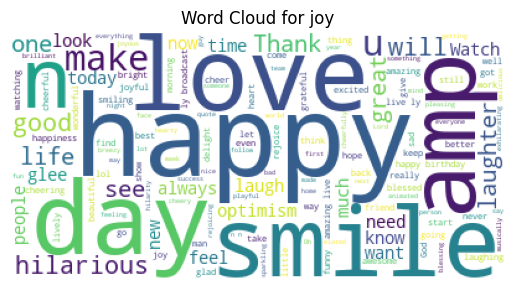

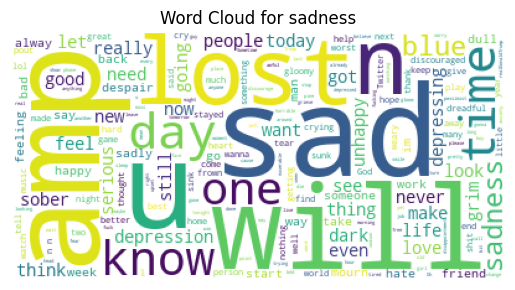

In [ ]:
from wordcloud import WordCloud

for emotion in df_all['Emotion'].unique():
    text = ' '.join(df_all[df_all['Emotion'] == emotion]['Tweet'])
    wc = WordCloud(background_color='white').generate(text)
    
    plt.figure()
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f"Word Cloud for {emotion}")
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sampled_df_all= df_all.sample(1000, random_state=42)

# Group by label and get common words
for emotion in sampled_df['Emotion'].unique():
    texts = sampled_df[sampled_df['Emotion'] == emotion]['Tweet']
    
    vec = CountVectorizer(stop_words='english', max_features=10)
    X = vec.fit_transform(texts)
    top_words = vec.get_feature_names_out()

    print(f"\nTop words for '{emotion}':")
    print(", ".join(top_words))


Top words for 'fear':
amp, bad, don, fear, just, know, like, nervous, start, today

Top words for 'joy':
amazing, birthday, day, good, happy, just, know, live, smile, watch

Top words for 'sadness':
dark, day, depression, don, feel, just, like, lost, sadness, time

Top words for 'anger':
anger, don, just, know, life, like, mad, need, think, time


160 6


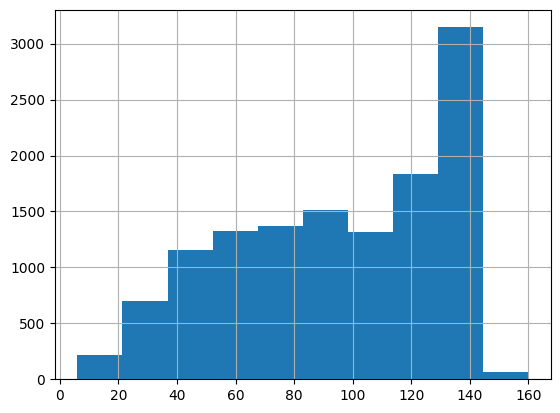

In [8]:
# Word lengths histogram:

df["Tweet"].str.len().hist()
print(max(df["Tweet"].str.len()), min(df["Tweet"].str.len()))

# String length range: 6 - 160

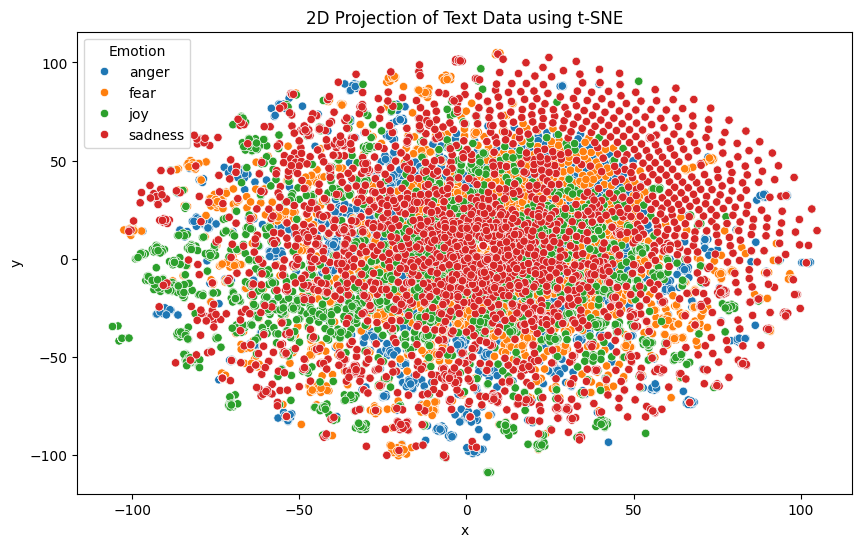

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df_all['Tweet'])

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_reduced = tsne.fit_transform(X.toarray())

# 3. Plot
reduced_df= pd.DataFrame(X_reduced, columns=['x', 'y'])
reduced_df['Emotion'] = df_all['Emotion'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_df, x='x', y='y', hue='Emotion', palette='tab10')
plt.title("2D Projection of Text Data using t-SNE")
plt.show()

In [ ]:
import pandas as pd

emotion_words = ['anger', 'joy', 'fear', 'sadness']
leakage_counts = {}

for emotion in emotion_words:
    subset = df_all[df_all['Emotion'] == emotion]

    count = subset['Tweet'].str.contains(rf'\b{emotion}\b', case=False, regex=True).sum()
    total = len(subset)

    leakage_counts[emotion] = {
        'total_tweets': total,
        'contains_word': count,
        'percentage': round((count / total) * 100, 2) if total else 0
    }

leakage_df= pd.DataFrame(leakage_counts).T
print(leakage_df)

         total_tweets  contains_word  percentage
anger          3091.0          123.0        3.98
joy            3011.0           60.0        1.99
fear           3627.0          140.0        3.86
sadness        2905.0          104.0        3.58
